# Problema do Caixeiro Viajante
## 2. Refinamento

***
### Inicialização


Solucao construida de forma aleatoria:
48 -> 27 -> 0 -> 46 -> 12 -> 47 -> 4 -> 17 -> 37 -> 15 -> 44 -> 42 -> 19 -> 41 -> 13 -> 25 -> 14 -> 6 -> 23 -> 7 -> 26 -> 8 -> 31 -> 28 -> 3 -> 20 -> 35 -> 36 -> 29 -> 21 -> 50 -> 9 -> 49 -> 10 -> 30 -> 34 -> 16 -> 2 -> 11 -> 32 -> 1 -> 22 -> 38 -> 5 -> 45 -> 33 -> 39 -> 18 -> 24 -> 43 -> 40 -> 48

Funcao objetivo = 540.8036


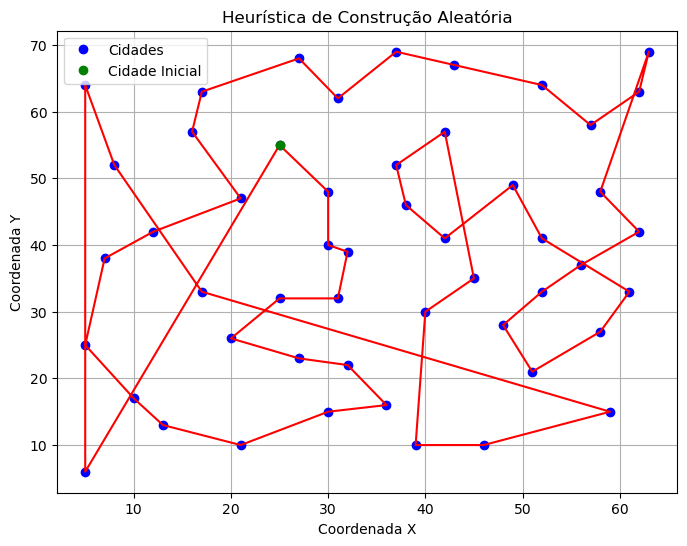

In [1]:
# Biliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas do projeto
import src.construcao as construcao
import src.utils as utils

# Parametros
arquivo = 'data/c50.txt'
nome_index = 'index'
nome_coord_x = 'coord_x'
nome_coord_y = 'coord_y'

# Carrega dados
df_cidades = utils.carrega_dados(arquivo, nome_index, nome_coord_x, nome_coord_y)

# Calcula quantidade de cidades
n = len(df_cidades)

# Gera matriz de distancias
d = utils.calc_distancias(df_cidades, nome_index, nome_coord_x, nome_coord_y)

# Converter DataFrame para array NumPy
cidades = df_cidades[['coord_x', 'coord_y']].values

#--------------------------------------------------------------------------------------
# Solução Inicial - Guloso Vizinho Mais Proximo
s = []

# Gera Solução Inicial
# s = construcao.constroi_solucao_aleatoria(n, s, d) # Aleatório
s = construcao.constroi_guloso_vizinho_mais_proximo(n, s, d)# Guloso Vizinho Mais Proximo

fo = utils.calcula_fo(n, s, d)
print("\nSolucao construida de forma aleatoria:")

utils.imprime_rota(s, n)
print(f"\n\nFuncao objetivo = {round(fo, 4)}")


#-----------------------------------------------------------------------------------------------

# Plota o percurso
plt.figure(figsize=(8, 6))
plt.plot(cidades[:, 0], cidades[:, 1], 'bo', label='Cidades')
plt.plot(cidades[s, 0], cidades[s, 1], 'r-')
plt.plot(cidades[s[0], 0], cidades[s[0], 1], 'go', label='Cidade Inicial')
plt.legend()
plt.title(f'Heurística de Construção Aleatória')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid()
plt.show()


***
## Métodos de Refinamento

In [2]:
# import numpy as np
import random
import src.utils as utils


def descida_best_improvement(n, s, d):
    """
    Implementa o método Best Improvement para o Problema do Caixeiro Viajante.

    Args:
        n (int): Número de cidades.
        s (list): Solução inicial representada como uma lista de ordem de visita das cidades.
        d (numpy.ndarray): Matriz de distâncias entre as cidades.

    Returns:
        tuple: Uma tupla contendo a melhor solução encontrada e seu custo.
    """
    melhor_solucao = s.copy()
    melhor_custo = utils.calcula_fo(n, s, d)
    for i in range(n):
        for j in range(i + 1, n):
            # Troca duas cidades na rota
            s[i], s[j] = s[j], s[i]
            custo_atual = utils.calcula_fo(n, s, d)
            if custo_atual < melhor_custo:
                # Se a troca melhorar o custo, atualiza a solução
                melhor_solucao = s.copy()
                melhor_custo = custo_atual
            else:
                # Caso contrário, desfaz a troca
                s[i], s[j] = s[j], s[i]
    return melhor_solucao, melhor_custo

def descida_first_improvement(n, s, d):
    """
    Implementa o método First Improvement para o Problema do Caixeiro Viajante.

    Args:
        n (int): Número de cidades.
        s (list): Solução inicial representada como uma lista de ordem de visita das cidades.
        d (numpy.ndarray): Matriz de distâncias entre as cidades.

    Returns:
        tuple: Uma tupla contendo a melhor solução encontrada e seu custo.
    """
    melhor_solucao = s.copy()
    melhor_custo = utils.calcula_fo(n, s, d)
    for i in range(n):
        for j in range(i + 1, n):
            # Troca duas cidades na rota
            s[i], s[j] = s[j], s[i]
            custo_atual = utils.calcula_fo(n, s, d)
            if custo_atual < melhor_custo:
                # Se a troca melhorar o custo, retorna a nova solução
                return s, custo_atual
            # Caso contrário, desfaz a troca
            s[i], s[j] = s[j], s[i]
    return melhor_solucao, melhor_custo

def descida_random_improvement(n, s, d):
    """
    Implementa o método Random Improvement para o Problema do Caixeiro Viajante.

    Args:
        n (int): Número de cidades.
        s (list): Solução inicial representada como uma lista de ordem de visita das cidades.
        d (numpy.ndarray): Matriz de distâncias entre as cidades.

    Returns:
        tuple: Uma tupla contendo a melhor solução encontrada e seu custo.
    """
    melhor_solucao = s.copy()
    melhor_custo = utils.calcula_fo(n, s, d)
    for _ in range(n * n):  # Faça um número fixo de tentativas
        i, j = random.sample(range(n), 2)
        # Troca duas cidades aleatórias na rota
        s[i], s[j] = s[j], s[i]
        custo_atual = utils.calcula_fo(n, s, d)
        if custo_atual < melhor_custo:
            # Se a troca melhorar o custo, atualiza a solução
            melhor_solucao = s.copy()
            melhor_custo = custo_atual
        else:
            # Caso contrário, desfaz a troca
            s[i], s[j] = s[j], s[i]
    return melhor_solucao, melhor_custo


print("Solução inicial:", s)
print("Custo inicial:", utils.calcula_fo(n, s, d))

# Aplica os métodos de descida
melhor_solucao_best, melhor_custo_best = descida_best_improvement(n, s.copy(), d)
melhor_solucao_first, melhor_custo_first = descida_first_improvement(n, s.copy(), d)
melhor_solucao_random, melhor_custo_random = descida_random_improvement(n, s.copy(), d)

print("\nBest Improvement:")
print("Melhor solução encontrada:", melhor_solucao_best)
print("Custo da melhor solução:", melhor_custo_best)

print("\nFirst Improvement:")
print("Melhor solução encontrada:", melhor_solucao_first)
print("Custo da melhor solução:", melhor_custo_first)

print("\nRandom Improvement:")
print("Melhor solução encontrada:", melhor_solucao_random)
print("Custo da melhor solução:", melhor_custo_random)


Solução inicial: [11, 32, 1, 22, 28, 31, 8, 26, 7, 23, 48, 27, 0, 46, 12, 47, 4, 17, 37, 15, 44, 42, 19, 41, 13, 25, 14, 6, 24, 43, 18, 5, 38, 9, 50, 16, 2, 29, 21, 34, 30, 10, 49, 39, 33, 45, 40, 20, 35, 36, 3, 11]
Custo inicial: 544.4749621206468

Best Improvement:
Melhor solução encontrada: [11, 32, 1, 22, 28, 31, 8, 26, 7, 23, 48, 27, 0, 46, 12, 47, 4, 40, 17, 37, 44, 42, 19, 41, 13, 25, 14, 43, 24, 6, 18, 5, 38, 9, 50, 16, 2, 29, 21, 34, 30, 49, 10, 39, 33, 45, 15, 20, 35, 36, 3, 11]
Custo da melhor solução: 517.4511389706162

First Improvement:
Melhor solução encontrada: [11, 32, 1, 22, 28, 31, 8, 26, 7, 23, 48, 27, 0, 46, 12, 47, 4, 40, 37, 15, 44, 42, 19, 41, 13, 25, 14, 6, 24, 43, 18, 5, 38, 9, 50, 16, 2, 29, 21, 34, 30, 10, 49, 39, 33, 45, 17, 20, 35, 36, 3, 11]
Custo da melhor solução: 544.1608166729106

Random Improvement:
Melhor solução encontrada: [11, 32, 1, 22, 28, 31, 8, 26, 7, 23, 48, 27, 0, 46, 12, 47, 4, 17, 37, 15, 44, 42, 19, 40, 41, 13, 25, 14, 24, 43, 6, 18, 5, 

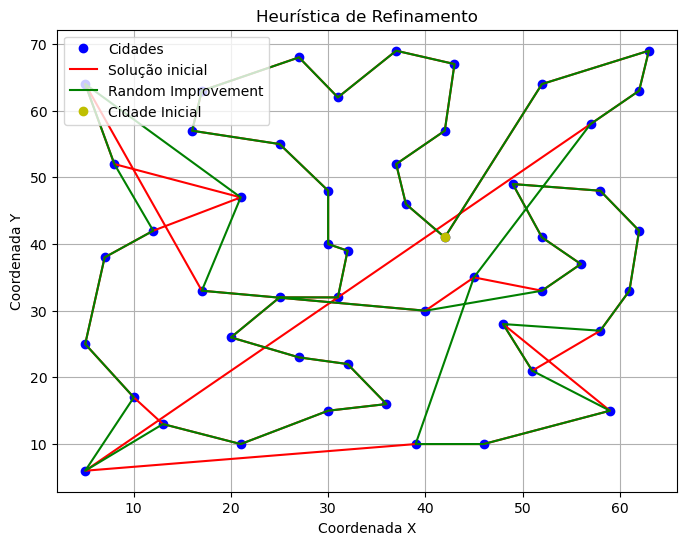

In [3]:
# Plota o percurso
plt.figure(figsize=(8, 6))
plt.plot(cidades[:, 0], cidades[:, 1], 'bo', label='Cidades')
plt.plot(cidades[s, 0], cidades[s, 1], 'r-', label='Solução inicial')
plt.plot(cidades[melhor_solucao_random, 0], cidades[melhor_solucao_random, 1], 'g-', label='Random Improvement')
plt.plot(cidades[s[0], 0], cidades[s[0], 1], 'yo', label='Cidade Inicial')
plt.legend()
plt.title(f'Heurística de Refinamento')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid()
plt.show()